In [76]:
import pandas as pd
import seaborn as sns
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder

In [77]:
df = pd.read_csv('/content/2249.csv')
df_test = pd.read_csv('/content/4294.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       102 non-null    object 
 1   list_id    102 non-null    int64  
 2   object_id  102 non-null    int64  
 3   target_1   102 non-null    float64
 4   x_1        102 non-null    float64
 5   x_2        102 non-null    float64
 6   x_3        102 non-null    float64
 7   x_4        102 non-null    int64  
 8   x_5        102 non-null    int64  
 9   x_5.1      102 non-null    int64  
 10  x_6        102 non-null    float64
 11  x_7        102 non-null    float64
 12  target_2   102 non-null    object 
 13  x_9        102 non-null    int64  
 14  x_10       102 non-null    int64  
dtypes: float64(6), int64(7), object(2)
memory usage: 12.1+ KB


In [78]:
independent_features = ['target_1','x_1','x_2','x_3','x_4','x_5','x_5','x_6','x_7','x_9','x_10']

target_feature = ['target_2']

df_cut = df[independent_features + target_feature]

df_test_cut = df_test[independent_features + target_feature]


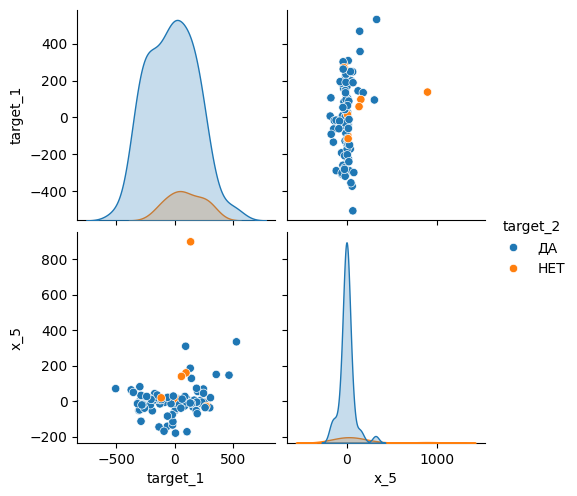

In [61]:
sns.pairplot(df_cut, hue=target_feature[0])

In [79]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df_cut['target_2'] = encoder.fit_transform(df_cut['target_2'])


<ipython-input-79-6f642718a8da>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cut['target_2'] = encoder.fit_transform(df_cut['target_2'])


In [80]:
# Создаем и тренируем модель
gradient_boosting_model = GradientBoostingRegressor()
gradient_boosting_model.fit(df_cut[independent_features].values.reshape(-1, len(independent_features)), y=df_cut[target_feature].values)

ValueError: cannot reshape array of size 1326 into shape (11)

In [72]:
gradient_boosting_model.feature_importances_

array([0.53224924, 0.46775076])

In [69]:
# Предсказание
df_cut['Predicted'] = gradient_boosting_model.predict(df_cut[independent_features].values.reshape(-1, len(independent_features)))


<ipython-input-69-558f648d56ca>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cut['Predicted'] = gradient_boosting_model.predict(df_cut[independent_features].values.reshape(-1, len(independent_features)))


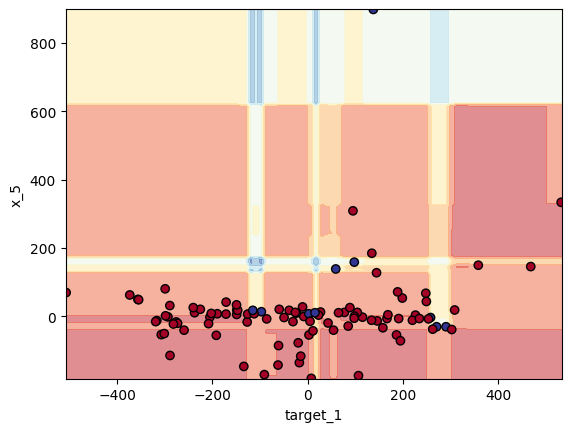

In [71]:
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt

data_reshaped = df_cut[independent_features].values.reshape(-1, len(independent_features))
disp = DecisionBoundaryDisplay.from_estimator(
    gradient_boosting_model, data_reshaped, response_method="predict",
    xlabel=independent_features[0], ylabel=independent_features[1],
    alpha=0.5,
    cmap=plt.cm.RdYlBu
)
disp.ax_.scatter(data_reshaped[:, 0], data_reshaped[:, 1], c=encoded_gender, cmap=plt.cm.RdYlBu, edgecolor="k")

## Оценка точности

In [ ]:
# Матрица смежности показывающая, сколько было угадано верно, сколько ошибочно
pd.crosstab(df_test_cut['Predicted'], df_test_cut[target_feature[0]])

Your insitute,Другое,Естественный (биология-химия-физика-технари),Математический и ИТ,Педагогический,СоцГум,Экономический,Юридический
Predicted,,,,,,,
Другое,5,5,1,1,1,1,1
Естественный (биология-химия-физика-технари),0,8,0,3,0,0,0
Математический и ИТ,0,8,30,1,0,8,1
Педагогический,0,2,3,2,0,3,0
СоцГум,0,0,0,0,6,1,0
Экономический,2,0,2,1,1,0,0
Юридический,0,0,0,0,1,0,0


In [ ]:
data_reshaped = df_test_cut[independent_features].values.reshape(-1, len(independent_features))
disp = DecisionBoundaryDisplay.from_estimator(
    forest_model, data_reshaped, response_method="predict",
    xlabel=independent_features[0], ylabel=independent_features[1],
    alpha=0.5,
    cmap=plt.cm.RdYlBu
)
disp.ax_.scatter(data_reshaped[:, 0], data_reshaped[:, 1], c=encoded_gender, cmap=plt.cm.RdYlBu, edgecolor="k")

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

precision_recall_fscore_support(df_test_cut[target_feature], df_test_cut['Predicted'])

(array([0.33333333, 0.72727273, 0.625     , 0.2       , 0.85714286,
        0.        , 0.        ]),
 array([0.71428571, 0.34782609, 0.83333333, 0.25      , 0.66666667,
        0.        , 0.        ]),
 array([0.45454545, 0.47058824, 0.71428571, 0.22222222, 0.75      ,
        0.        , 0.        ]),
 array([ 7, 23, 36,  8,  9, 13,  2]))

<Axes: xlabel='Russian rating', ylabel='Maths rating'>

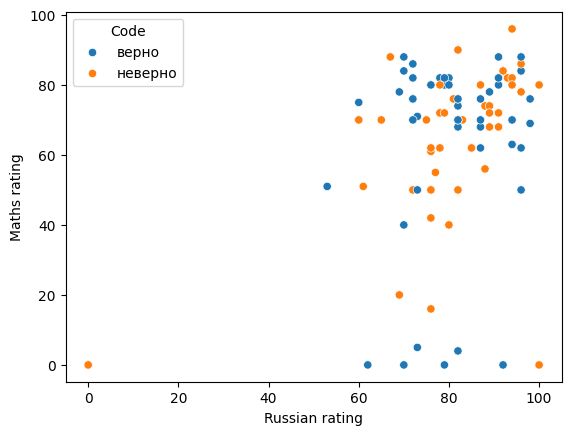

In [ ]:
# оцениваем точность предсказаний
df_test_cut['Code'] = 'верно'
df_test_cut.loc[(df_test_cut[target_feature[0]] != df_test_cut['Predicted']), 'Code'] = 'неверно'
sns.scatterplot(data=df_test_cut, x='Russian rating', y='Maths rating', hue='Code')

In [ ]:
len(df_test_cut[df_test_cut['Code'] == 'неверно'])

47